In [102]:
import wrds
db = wrds.Connection()

Enter your WRDS username [giova]:djolitto
Enter your password:········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
Loading library list...
Done


In [103]:
#query for getting the data
data = db.raw_sql("select date, permco, ret, vol from crsp.dsf where permco in (7,35048, 8048, 21446, 20792) and date>='2001-01-01' and date<='2021-12-31'")

#we modify the data in order to get log return as done in exercises 3

data["ret"] = np.log(data["ret"] + 1)


In [104]:
#saving the dataframe into an csv
file = pd.DataFrame.to_csv(data,"file.csv")

#read the file that we have saved 
data = pd.read_csv("file.csv")

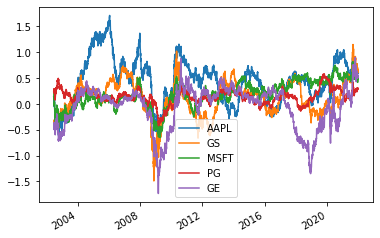

In [107]:
#we need to repeat what we have done in the exercise 3
index = pd.DatetimeIndex(data.loc[data["permco"] == 20792]["date"].values)

newdata = pd.DataFrame(index = index)
newdata["AAPL"] = data.loc[data["permco"] == 7]["ret"].values
newdata["GS"] = data.loc[data["permco"] == 35048]["ret"].values
newdata["MSFT"] = data.loc[data["permco"] == 8048]["ret"].values
newdata["PG"] = data.loc[data["permco"] == 21446]["ret"].values
newdata["GE"] = data.loc[data["permco"] == 20792]["ret"].values

weekly_newdata = newdata.resample("W").sum()
monthly_newdata = newdata.resample("M").sum()


mean_from_daily = newdata.rolling(365).mean()*365
std_from_daily = newdata.rolling(365).std() * np.sqrt(365) 

#using a rolling windows but using monthly returns instead of daily as did above 
mean_from_monthly = monthly_newdata.rolling(12).mean() * 12 
std_from_monthly = monthly_newdata.rolling(12).std() * np.sqrt(12) 

#test to see if it works
mean_from_daily.plot()
plt.show()